In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Data=pd.read_csv("/content/diabetes.csv")

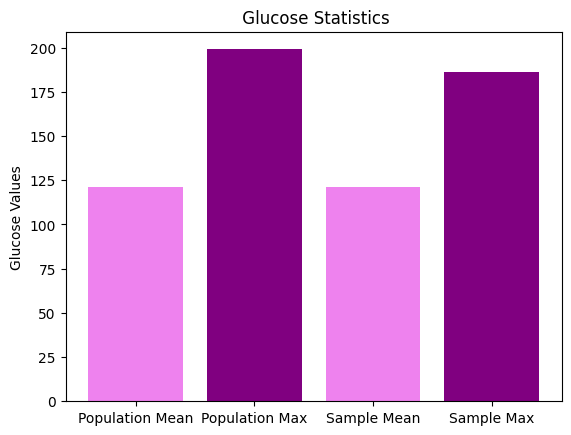

In [4]:

np.random.seed(873)


samples = Data.sample(25)

pop_mean_glucose = Data['Glucose'].mean()
pop_max_glucose = Data['Glucose'].max()

sample_mean_glucose = samples['Glucose'].mean()
sample_max_glucose = samples['Glucose'].max()


# Create a bar chart for comparison
lbl = ['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max']
value = [pop_mean_glucose, pop_max_glucose, sample_mean_glucose, sample_max_glucose]

plt.bar(lbl, value, color=['violet', 'purple', 'violet', 'purple'])
plt.title(' Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()


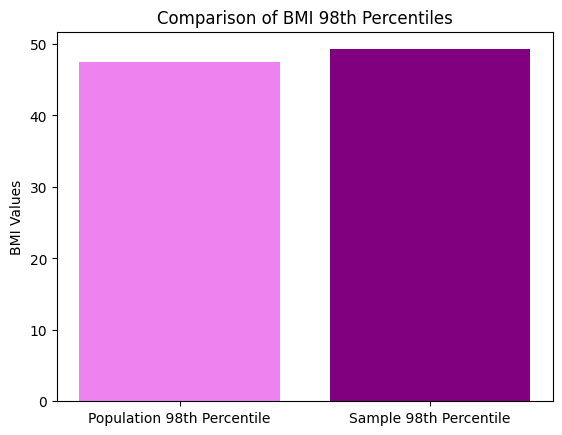

In [7]:
pop_percent = np.percentile(Data['BMI'], 98)
sample_percent = np.percentile(samples['BMI'], 98)

lbl = ['Population 98th Percentile', 'Sample 98th Percentile']
value = [pop_percent, sample_percent]

plt.bar(lbl, value, color=['violet', 'purple'])
plt.title('Comparison of BMI 98th Percentiles')
plt.ylabel('BMI Values')
plt.show()

In [8]:

btp_samples = 500
sample_size = 150


btp_means = np.zeros(btp_samples)
btp_std_devs = np.zeros(btp_samples)
btp_percentiles = np.zeros(btp_samples)


for i in range(btp_samples):
    btp_sample = Data['BloodPressure'].sample(sample_size, replace=True)
    btp_means[i] = btp_sample.mean()
    btp_std_devs[i] = btp_sample.std()
    btp_percentiles[i] = np.percentile(btp_sample, 98)


pop_mean = Data['BloodPressure'].mean()
pop_std_dev = Data['BloodPressure'].std()
pop_percentile = np.percentile(Data['BloodPressure'], 98)


bmean=np.mean(btp_means)
bsd=np.mean(btp_std_devs)
bp=np.mean(btp_percentiles)


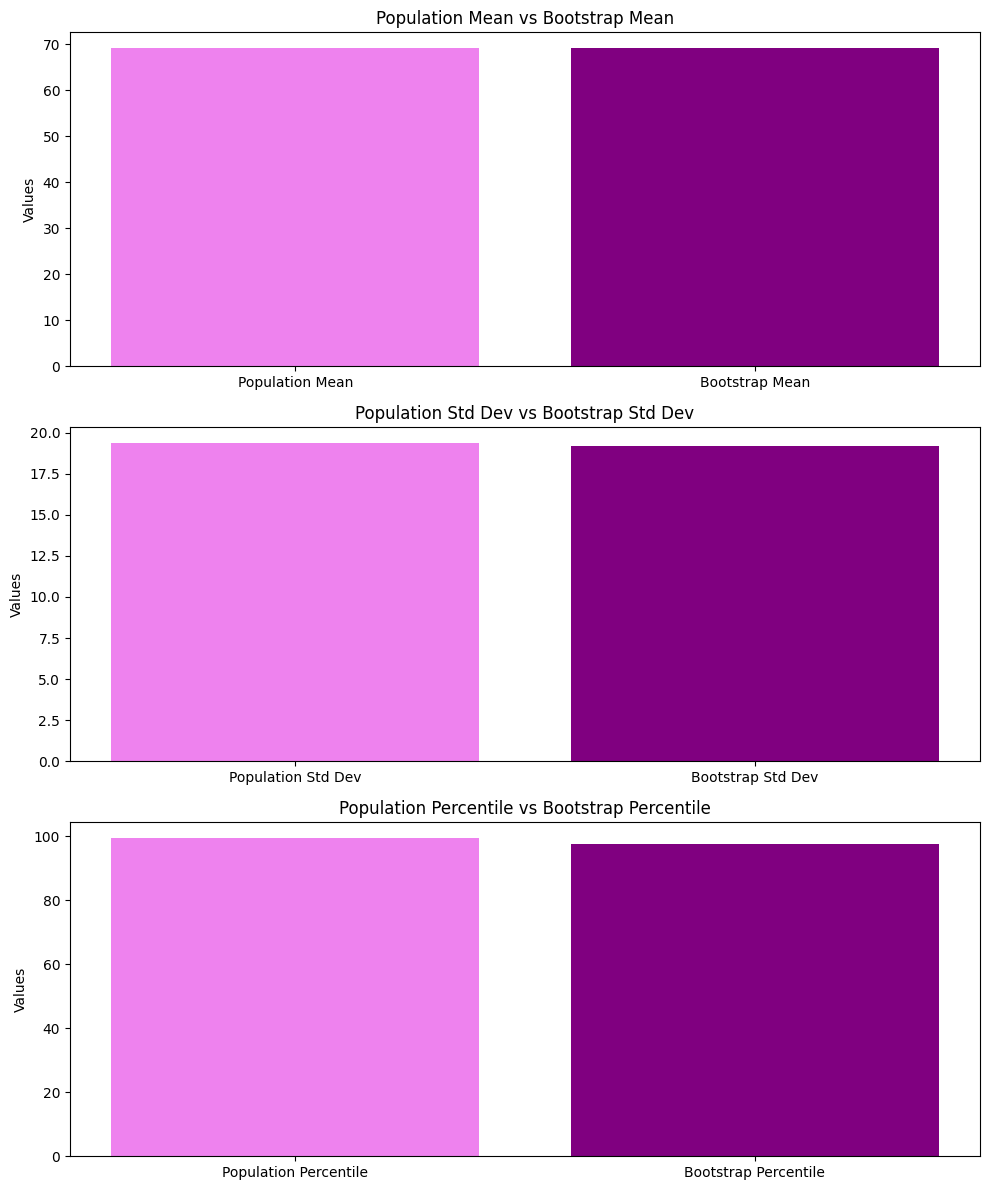

In [11]:
fig, axis = plt.subplots(3, 1, figsize=(10, 12))


axis[0].bar(['Population Mean', 'Bootstrap Mean'], [pop_mean, bmean], color=['violet', 'purple'])
axis[0].set_ylabel('Values')
axis[0].set_title('Population Mean vs Bootstrap Mean')


axis[1].bar(['Population Std Dev', 'Bootstrap Std Dev'], [pop_std_dev, bsd], color=['violet', 'purple'])
axis[1].set_ylabel('Values')
axis[1].set_title('Population Std Dev vs Bootstrap Std Dev')


axis[2].bar(['Population Percentile', 'Bootstrap Percentile'], [pop_percentile, bp], color=['violet', 'purple'])
axis[2].set_ylabel('Values')
axis[2].set_title('Population Percentile vs Bootstrap Percentile')

plt.tight_layout()
plt.show()